In [138]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#read data file
data = pd.read_csv('HR_comma_sep.csv')
data.head() # will give top five rows 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [81]:
data.tail() # give last five rows 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [82]:
data.shape # print shape(row, column)

(14999, 10)

In [83]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [84]:
data.info()  # check what kind of datas are 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)

In [85]:
# check how many salary types we have 
print data.groupby('salary').size()

salary
high      1237
low       7316
medium    6446
dtype: int64


In [86]:
data.isnull().values.any()  # check data has any values null/nan or not

False

In [87]:
column_names = data.columns.tolist()
print column_names

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [88]:
data[data['left'] == 1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64

3571 employees are left out of 14999.

In [128]:
#data[data['left'] == 0].count() 
    # or
data[data['left'] == 0].shape[0]    

11428

In [101]:
# 11428 number of employee are still working.

Why employees are leaving?

In [98]:
a = data[data['left']==1].mean()
print a

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64


In [ ]:
b  = data[data['left'] == 0].mean()
print b

In [108]:
work_hour  = a['average_montly_hours']/30
working_hour = b['average_montly_hours']/30
print "working_hour of those who have left = ", work_hour
print "working_hour of those who are still working = ", working_hour

working_hour of those who have left =  6.91397367684
working_hour of those who are still working =  6.63534010034


In [111]:
promotion = a['promotion_last_5years']
pro =  b['promotion_last_5years']
print "promotion_last_5years those who have left = ", promotion
print "promotion_last_5years those who are working = ", pro
print "promotion_last_5years percentage more than who left = ", (pro/promotion)%100

promotion_last_5years those who have left =  0.00532063847662
promotion_last_5years those who are working =  0.0262513125656
promotion_last_5years percentage more than who left =  4.93386511431


if we compare a and b then we can say main reaspon are promotion_last_5years,working hours,time_spend_company,last_evaluation
  

In [131]:
# lets see the reason for leaving employee by correlation

In [133]:
variable_correlation = data.corr()
variable_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Correlation matrix

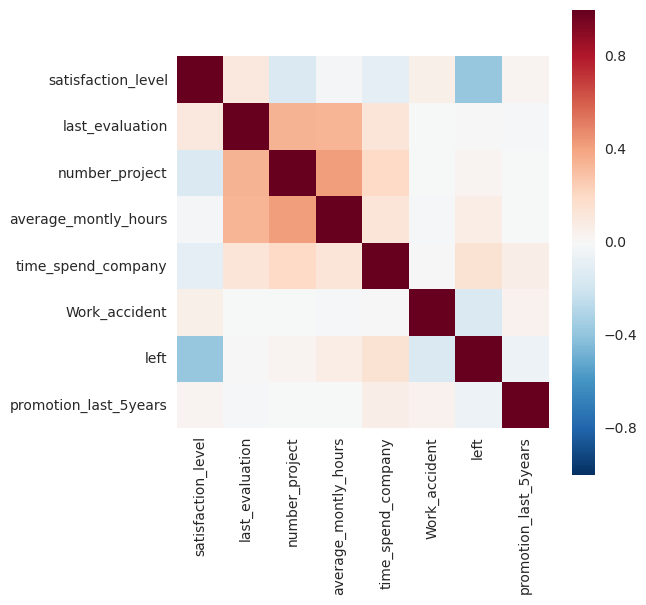

In [141]:
f, ax = plt.subplots(figsize=(6, 6))
# Draw the heatmap using seaborn
sns.heatmap(variable_correlation, square=True)
plt.show()

In [150]:
# box plot to see comparision by salary

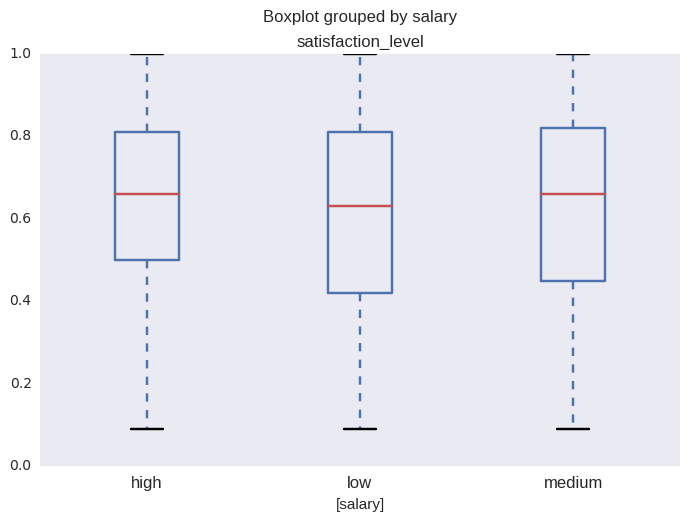

In [151]:
data.boxplot(column= 'satisfaction_level', by='salary', grid=False)

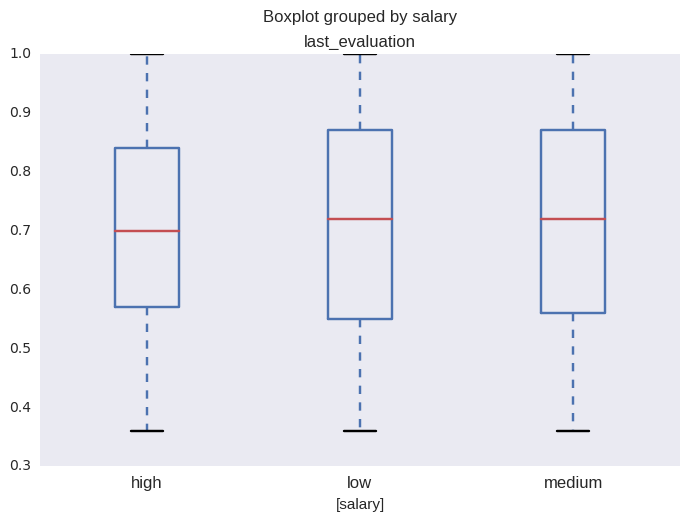

In [152]:
data.boxplot(column= 'last_evaluation', by='salary', grid=False)

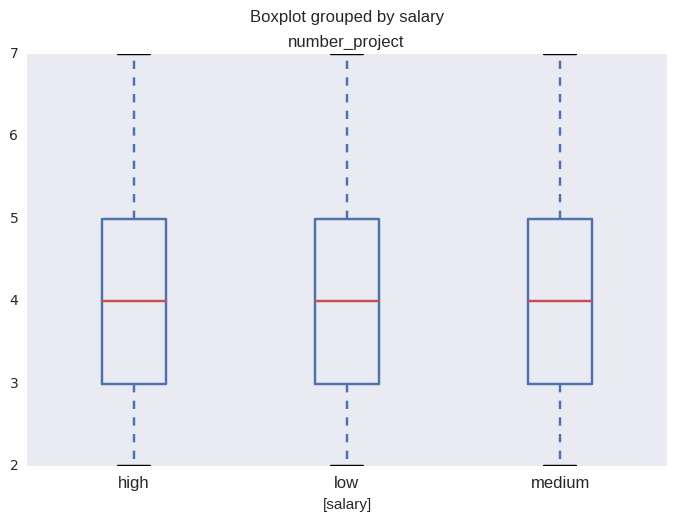

In [160]:
data.boxplot(column= 'number_project', by='salary', grid=False)


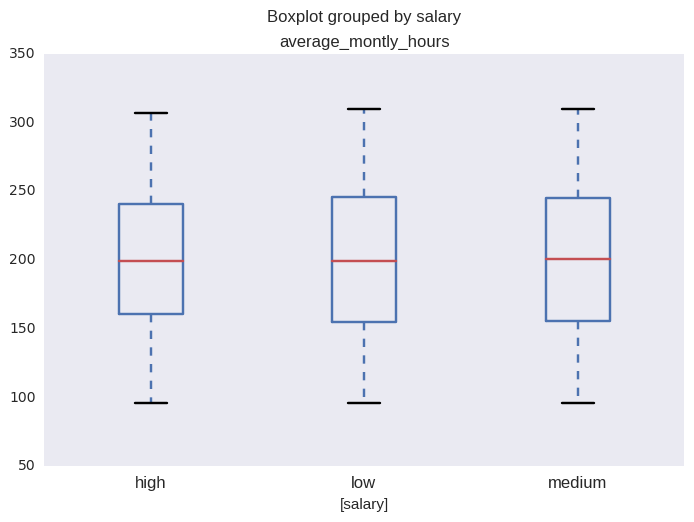

In [161]:
data.boxplot(column= 'average_montly_hours', by='salary', grid=False)

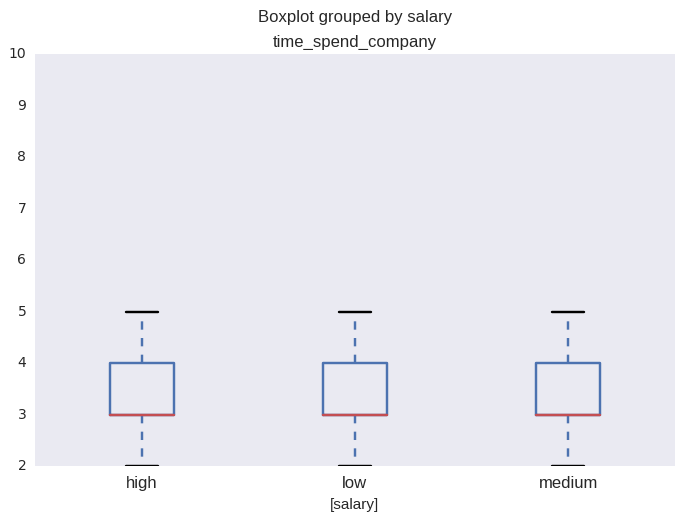

In [162]:
data.boxplot(column= 'time_spend_company', by='salary', grid=False)

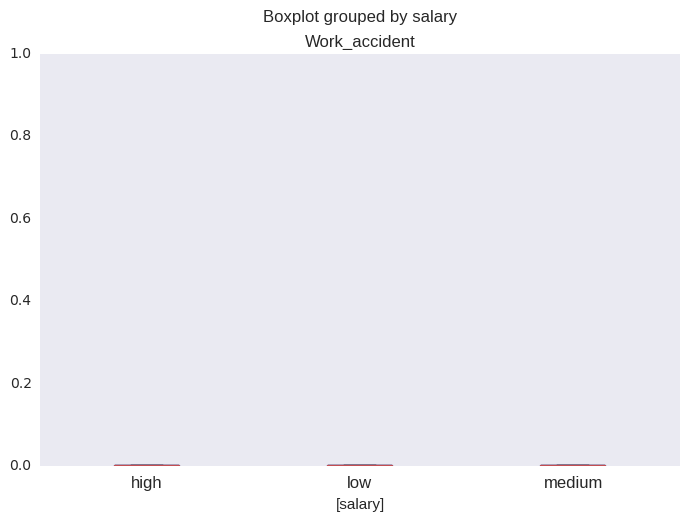

In [163]:
data.boxplot(column= 'Work_accident', by='salary', grid=False)

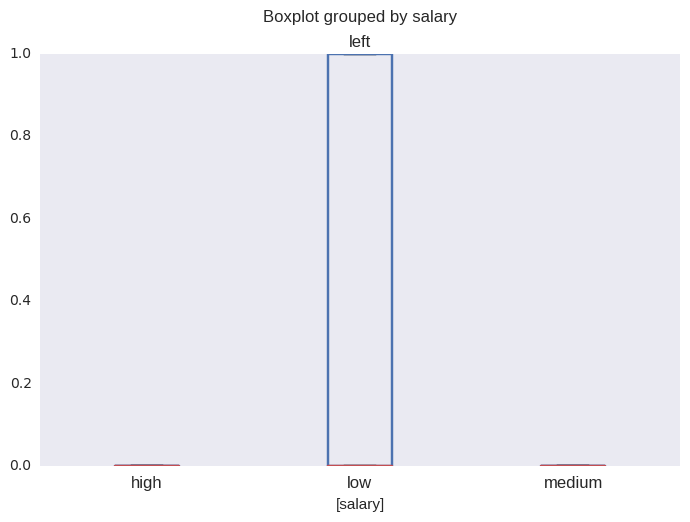

In [164]:
data.boxplot(column= 'left', by='salary', grid=False)

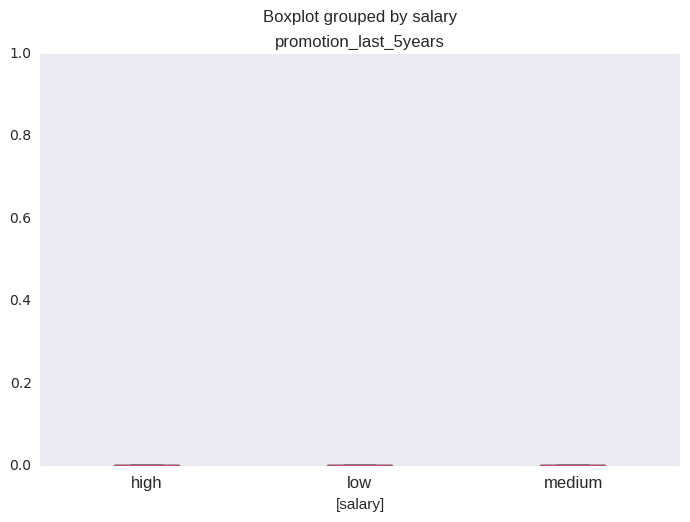

In [165]:
data.boxplot(column= 'promotion_last_5years', by='salary', grid=False)

# make prediction of (left = 1 ) by other features

In [284]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

In [285]:
for i, salary in enumerate(data.salary):
     if salary=='low':
        data.salary[i]=1

     elif salary=='medium':
        data.salary[i]=2
            
     elif salary == 'high':
        data.salary[i] = 3
    
sales = sorted(data['sales'].unique())
gen_mapp = dict(zip(sales, range(0, len(sales) + 1)))
data['sales']  = data['sales'].map(gen_mapp).astype(int) 

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [286]:
df = data
df = df.drop(['left'],axis = 1)
X = df.values
y = data['left'].values # target data

In [306]:
# 70-25% of train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [303]:
rand_forest = RandomForestClassifier()
rand_forest.fit(Xtrain, ytrain)
y_pred = rand_forest.predict_proba(Xtest)

In [304]:
accuracy = rand_forest.score(Xtest,ytest)
print accuracy

0.989333333333


In [307]:
# cross validation
cross_val_score(rand_forest,X,y,cv=10)

array([ 0.99333333,  0.992     ,  0.99466667,  0.99      ,  0.988     ,
        0.99133333,  0.992     ,  0.98933333,  0.992     ,  0.99332889])

In [313]:
# feature importance
pd.DataFrame([df.columns,rand_forest.feature_importances_])

,0,1,2,3,4,5,6,7,8
0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
1,0.3659873,0.1009422,0.1636632,0.1575158,0.1824868,0.006230687,0.0007635646,0.0129979,0.009412408


# Predict who will definatly leave. 

In [238]:
df1 = data[data['left']==0] 

In [247]:
X = df1.values
print X

[[0.58 0.74 4 ..., 0 7 1]
 [0.82 0.67 2 ..., 0 7 1]
 [0.45 0.69 5 ..., 0 7 1]
 ..., 
 [0.85 0.54 3 ..., 1 4 3]
 [0.33 0.65 3 ..., 1 5 3]
 [0.5 0.73 4 ..., 0 0 1]]


In [252]:
pred = rand_forest.predict_proba(X)
pred

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [250]:
sum(pred[:,1]==1)

3

Higly chance of leaving job probabilty is > 75%



In [260]:
df1['Soon leave'] = pred[:,1]
df1[df1['Soon leave'] >=0.75]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,Soon leave
6263,0.90,0.87,4,231,5,0,0,4,1,0.9
6358,0.81,0.98,5,243,6,0,0,7,2,1.0
6466,0.39,0.57,2,132,3,0,0,8,1,1.0
7443,0.85,0.96,4,240,6,0,0,9,2,1.0


more than 50% chance to leave

In [263]:
df1[df1['Soon leave'] >=0.5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,Soon leave
2095,0.54,0.67,4,282,6,0,0,9,2,0.5
2233,0.70,0.89,6,214,2,0,0,7,1,0.6
3780,0.86,0.96,5,238,5,0,0,9,1,0.6
5386,0.84,0.93,6,166,4,0,0,9,1,0.5
5690,0.40,0.62,3,283,5,0,0,9,1,0.7
5697,0.81,0.98,6,196,2,0,0,8,1,0.5
6263,0.90,0.87,4,231,5,0,0,4,1,0.9
6358,0.81,0.98,5,243,6,0,0,7,2,1.0
6466,0.39,0.57,2,132,3,0,0,8,1,1.0
7443,0.85,0.96,4,240,6,0,0,9,2,1.0
